In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import matplotlib
global df_pred,pred_all
from sklearn.externals import joblib

import sys
import warnings
pd.options.mode.chained_assignment = None 
from datetime import datetime


In [2]:
def predictor_mean(model0_1,modelo_2,X_set):  
    #aplicamos los predict
    forecast_q = model0_1.predict(X_set) 
    forecast = modelo_2.predict(X_set)
   #generamos una lista dummy: 
    forecast_mean = forecast 
    
    for i in range(len(X_set)):
        if  forecast[i] < 135:
            forecast_mean[i] = forecast[i]
        elif  forecast_q[i] > 160:
            forecast_mean[i] = forecast_q[i]
        if  130 < forecast_q[i] <155 and 130 < forecast[i] < 155:
            forecast_mean[i] = (0.3*forecast_q[i] + 0.7*forecast[i])
        if  140 < forecast_q[i] <160 and 140 < forecast[i] < 160:
            forecast_mean[i] = (forecast_q[i] + forecast[i])/2
    return forecast_mean

In [3]:
dirección_modelos = "/DATA/paw/jupyterhub_notebook/daniel.bustillos/DanielBustillos/contaminación/pipeline-norberto/entrenamiento_sin_persistencia/modelos/"
path_final = "./datos/datos_pau.csv"
path_inicial = "./datos/ingesta_modelos_"

In [4]:
target1 = "PM10mean_max_frcst_"
conta1 = 'PM10'
target2 = "O3_max_frcst_"
conta2 = 'O3'
target = "O3_max_frcst_"
conta = 'O3'

In [5]:
df_predict = pd.read_csv(path_inicial + conta1 +'.csv') 
df_predict.sort_values("fecha",ascending=True)
df_predict.head()

,PM10mean_12.0_max,NO2_2.0_max,NO2_max,PM10_max,PM10_8.0_max,PM10mean_19.0_max,PM10mean_7.0_max,PM10mean_41.0_mean,PM10mean_18.0_max,PM10mean_37.0_max,...,TMP_mean_frcst_16,TMP_mean_frcst_17,TMP_mean_frcst_18,TMP_mean_frcst_19,TMP_mean_frcst_20,TMP_mean_frcst_21,TMP_mean_frcst_22,TMP_mean_frcst_23,TMP_mean_frcst_24,fecha
0,55.750000,39.0,31.0,75.0,47.0,32.458333,47.500000,21.145833,32.333333,23.375000,...,15.0,16.0,18.0,20.0,21.0,23.0,24.0,23.0,21.0,2019-08-22 15:00:00
1,56.166667,42.0,36.0,73.0,36.0,32.875000,49.166667,20.770833,32.458333,23.416667,...,15.0,15.0,16.0,18.0,20.0,21.0,23.0,24.0,23.0,2019-08-22 14:00:00
2,55.750000,47.0,39.0,72.0,34.0,32.583333,51.791667,20.062500,32.875000,23.416667,...,15.0,15.0,15.0,16.0,18.0,20.0,21.0,23.0,24.0,2019-08-22 13:00:00
3,54.583333,45.0,42.0,69.0,33.0,32.291667,54.375000,19.645833,32.583333,23.125000,...,15.0,15.0,15.0,15.0,16.0,18.0,20.0,21.0,23.0,2019-08-22 12:00:00
4,54.500000,40.0,47.0,73.0,37.0,31.416667,55.166667,19.395833,32.291667,22.666667,...,15.0,15.0,15.0,15.0,15.0,16.0,18.0,20.0,21.0,2019-08-22 11:00:00


In [6]:
#cargamos el DF
df_predict = pd.read_csv(path_inicial + conta1 +'.csv') 

df_fechas = df_predict["fecha"]
df_predict_1 = df_predict.copy()
df_predict_1.drop(["fecha"],inplace=True,axis=1)


#cargamos los modelos
model = [0 for col in range(25)]
for i in range(0,24):
    model[i] = joblib.load(str(dirección_modelos + conta1 +'/' + conta1 +'_'+str(i+1)+'hora.pkl'))

[17:43:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:43:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:43:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:43:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:43:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:43:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:43:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:43:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [7]:
model[12].predict(df_predict_1)

array([47.075542, 43.987286, 45.119114, ..., 42.665756, 46.8205  ,
       40.5374  ], dtype=float32)

In [9]:
df_predict.dropna(inplace=True)
df_predict.head()

,PM10mean_12.0_max,NO2_2.0_max,NO2_max,PM10_max,PM10_8.0_max,PM10mean_19.0_max,PM10mean_7.0_max,PM10mean_41.0_mean,PM10mean_18.0_max,PM10mean_37.0_max,...,TMP_mean_frcst_16,TMP_mean_frcst_17,TMP_mean_frcst_18,TMP_mean_frcst_19,TMP_mean_frcst_20,TMP_mean_frcst_21,TMP_mean_frcst_22,TMP_mean_frcst_23,TMP_mean_frcst_24,fecha
0,55.750000,39.0,31.0,75.0,47.0,32.458333,47.500000,21.145833,32.333333,23.375000,...,15.0,16.0,18.0,20.0,21.0,23.0,24.0,23.0,21.0,2019-08-22 15:00:00
1,56.166667,42.0,36.0,73.0,36.0,32.875000,49.166667,20.770833,32.458333,23.416667,...,15.0,15.0,16.0,18.0,20.0,21.0,23.0,24.0,23.0,2019-08-22 14:00:00
2,55.750000,47.0,39.0,72.0,34.0,32.583333,51.791667,20.062500,32.875000,23.416667,...,15.0,15.0,15.0,16.0,18.0,20.0,21.0,23.0,24.0,2019-08-22 13:00:00
3,54.583333,45.0,42.0,69.0,33.0,32.291667,54.375000,19.645833,32.583333,23.125000,...,15.0,15.0,15.0,15.0,16.0,18.0,20.0,21.0,23.0,2019-08-22 12:00:00
4,54.500000,40.0,47.0,73.0,37.0,31.416667,55.166667,19.395833,32.291667,22.666667,...,15.0,15.0,15.0,15.0,15.0,16.0,18.0,20.0,21.0,2019-08-22 11:00:00


## O3

In [10]:
dirección_modelos = "/DATA/paw/jupyterhub_notebook/daniel.bustillos/DanielBustillos/contaminación/pipeline-norberto/entrenamiento_sin_persistencia/modelos/"
path_final = "./datos/datos_pau.csv"
path_inicial = "./datos/ingesta_modelos_"

In [11]:
target1 = "PM10mean_max_frcst_"
conta1 = 'PM10'
target2 = "O3_max_frcst_"
conta2 = 'O3'
target = "O3_max_frcst_"
conta = 'O3'

In [12]:
df_predict_O3 = pd.read_csv(path_inicial + conta +'.csv') 
df_predict_O3.sort_values("fecha")
df_predict.tail()

,PM10mean_12.0_max,NO2_2.0_max,NO2_max,PM10_max,PM10_8.0_max,PM10mean_19.0_max,PM10mean_7.0_max,PM10mean_41.0_mean,PM10mean_18.0_max,PM10mean_37.0_max,...,TMP_mean_frcst_16,TMP_mean_frcst_17,TMP_mean_frcst_18,TMP_mean_frcst_19,TMP_mean_frcst_20,TMP_mean_frcst_21,TMP_mean_frcst_22,TMP_mean_frcst_23,TMP_mean_frcst_24,fecha
1258,39.045073,13.000000,25.0,21.0,54.596813,38.970999,39.096697,29.159618,38.965491,39.132975,...,16.500000,15.833333,15.333333,14.842105,14.571429,14.476190,14.285714,13.761905,13.380952,2019-07-01 05:00:00
1259,39.045073,14.000000,21.0,16.0,54.596813,38.970999,39.096697,29.159618,38.965491,39.132975,...,17.388889,16.500000,15.833333,15.333333,14.842105,14.571429,14.476190,14.285714,13.761905,2019-07-01 04:00:00
1260,39.045073,20.000000,13.0,28.0,54.596813,38.970999,39.096697,29.159618,38.965491,39.132975,...,18.055556,17.388889,16.500000,15.833333,15.333333,14.842105,14.571429,14.476190,14.285714,2019-07-01 03:00:00
1261,39.045073,33.928397,14.0,61.0,54.596813,38.970999,39.096697,29.159618,38.965491,39.132975,...,18.666667,18.055556,17.388889,16.500000,15.833333,15.333333,14.842105,14.571429,14.476190,2019-07-01 02:00:00
1262,39.045073,33.928397,20.0,32.0,54.596813,38.970999,39.096697,29.159618,38.965491,39.132975,...,18.277778,18.666667,18.055556,17.388889,16.500000,15.833333,15.333333,14.842105,14.571429,2019-07-01 01:00:00


In [13]:
#cargamos el DF
df_predict_O3 = pd.read_csv(path_inicial + conta +'.csv') 

df_fechas = df_predict_O3["fecha"]
df_predict_O3_1 = df_predict_O3.copy()
df_predict_O3_1.drop(["fecha"],inplace=True,axis=1)


#cargamos los modelos
model = [0 for col in range(25)]
for i in range(0,24):
    model[i] = joblib.load(str(dirección_modelos + conta+'/mal/' + conta +'_'+str(i+1)+'hora.pkl'))

[17:43:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:43:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:43:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:43:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:43:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:43:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:43:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:43:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [17]:
def prediccion(target,conta):

    #cargamos el DF
    df_predict = pd.read_csv(path_inicial + conta +'.csv') 

    df_fechas = df_predict["fecha"]
    df_predict.drop(["fecha"],inplace=True,axis=1)

    
    #cargamos los modelos
    model = [0 for col in range(25)]
    for i in range(0,24):
        model[i] = joblib.load(str(dirección_modelos + conta +'/mal/' + conta+'_'+str(i+1)+'hora.pkl'))
        
    #hacemos el predict

    for i in range(0,24):
        df_predicted = df_predict[["TMP_mean"]]
        df_predicted[target + str(i+1)] = model[i].predict(df_predict)
    
    df_predicted[target+'24'].head(1)
    
    pred = []
    for i in range(1,25):
        pred.append(df_predicted[str(target+str(i))].head(1).values[0])

    df_predicted["fecha"] = df_fechas

    ## predict de las últimas 12 horas
    df_predict_historico = df_predicted[["fecha",target+'12']].copy()

    
    if conta == "PM10":
        df_predict_historico["fecha"] = df_predict_historico["fecha"].shift(0)
    elif conta == "O3":
        df_predict_historico["fecha"] = df_predict_historico["fecha"].shift(12)
    else: print("ERROR")
        

    df_predict_historico = df_predict_historico[["fecha",target+'12']].dropna()#.iloc[12:,:]#.head(13)
    df_predict_historico.rename(columns={target+'24': conta+'_pron_a_12hrs'}, inplace=True)
    
    
    
    #predict 12 horas
    df_pred =  pd.DataFrame(columns=["pred_0"])
    for i in range(0,24):
        df_pred[str("pred_"+str(i))] = [pred[i]]

    for i in range(0,24):
        df_pred.loc[i,conta+'_pronóstico'] = df_pred.iloc[0,i]
    for i in range(0,24):
        df_pred.loc[i,'fecha'] = pd.date_range(df_fechas[0], periods=25, freq='H').tolist()[i+1]
        df_pred = df_pred[[conta+"_pronóstico","fecha"]]
            
    if conta == "PM10":
        df_predict = df_predict[["fecha","PM10","PM10_y","PM10_x","PM10mean_y"]]
    elif conta == "O3":
        df_predict = df_predict[["fecha",'TMP_x','TMP_y',
                                            'O3_y','O3','O3_x','RH','TMP']]
    else: print("ERROR")
        
        
    df_pred['fecha'] = df_pred['fecha'].astype(str)
    
    
    return  df_predict_historico,df_predict,df_pred

Ejecutamos la función:

In [18]:
df_predict_historico_O3,df_predict_O3,df_pred_O3 = prediccion(target2,conta2)
df_predict_historico_PM10,df_predict_PM10,df_pred_PM10 = prediccion(target1,conta1)

[17:45:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:45:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:45:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:45:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:45:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:45:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:45:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:45:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

ValueError: feature_names mismatch: ['O3_46.0_mean', 'O3_24.0_min', 'O3_max', 'O3_24.0_max', 'O3_22.0_min', 'O3_20.0_max', 'O3_46.0_max', 'RH_25.0_max', 'O3_47.0_mean', 'O3_21.0_min', 'TMP_1.0_min', 'TMP_24.0_mean', 'O3_3.0_min', 'O3_47.0_min', 'O3_44.0_mean', 'TMP_0.0_max', 'TMP_46.0_max', 'O3_23.0_max', 'O3_48.0_max', 'RH_21.0_max', 'TMP_45.0_max', 'TMP_48.0_max', 'RH_45.0_mean', 'O3_2.0_min', 'RH_mean', 'RH_48.0_mean', 'RH_23.0_min', 'O3_27.0_mean', 'RH_3.0_mean', 'O3_3.0_max', 'TMP_47.0_max', 'RH_48.0_min', 'O3_1.0_max', 'RH_min', 'TMP_mean', 'RH_2.0_min', 'TMP_1.0_mean', 'RH_23.0_mean', 'TMP_47.0_mean', 'O3_0.0_max', 'TMP_25.0_max', 'O3_21.0_max', 'RH_21.0_min', 'O3_2.0_mean', 'TMP_48.0_mean', 'O3_mean', 'TMP_2.0_max', 'O3_min', 'O3_20.0_min', 'RH_24.0_min', 'O3_45.0_mean', 'O3_25.0_min', 'O3_25.0_max', 'RH_25.0_mean', 'O3_48.0_min', 'O3_48.0_mean', 'O3_22.0_mean', 'O3_46.0_min', 'RH_22.0_mean', 'TMP_min', 'O3_1.0_mean', 'TMP_24.0_min', 'O3_44.0_min', 'RH_22.0_max', 'hora_12.0_min', 'TMP_2.0_mean', 'O3_24.0_mean', 'O3_0.0_mean', 'hora_12.0_max', 'O3_23.0_min', 'O3_45.0_max', 'O3_0.0_min', 'RH_22.0_min', 'RH_0.0_min', 'RH_45.0_min', 'O3_45.0_min', 'TMP_23.0_max', 'TMP_25.0_min', 'RH_1.0_mean', 'TMP_24.0_max', 'RH_1.0_min', 'hora_11.0_mean', 'O3_20.0_mean', 'TMP_22.0_max', 'TMP_2.0_min', 'O3_47.0_max', 'TMP_max', 'TMP_45.0_mean', 'TMP_1.0_max', 'RH_24.0_mean', 'RH_2.0_max', 'RH_3.0_max', 'O3_26.0_max', 'RH_26.0_min', 'RH_25.0_min', 'O3_27.0_max', 'RH_46.0_mean', 'RH_47.0_mean', 'RH_46.0_max', 'RH_48.0_max', 'O3_26.0_mean', 'TMP_0.0_min', 'hora_35.0_mean', 'RH_3.0_min', 'WSP_mean', 'O3_23.0_mean', 'O3_2.0_max', 'RH_21.0_mean', 'TMP_22.0_min', 'hora_35.0_max', 'RH_26.0_mean', 'RH_2.0_mean', 'O3_1.0_min', 'TMP_46.0_mean', 'O3_3.0_mean', 'RH_45.0_max', 'TMP_0.0_mean', 'TMP_23.0_min', 'TMP_22.0_mean', 'RH_max', 'RH_47.0_min', 'TMP_21.0_mean', 'O3_25.0_mean', 'TMP_23.0_mean', 'TMP_25.0_mean', 'O3_44.0_max', 'RH_0.0_max', 'RH_26.0_max', 'RH_1.0_max', 'RH_47.0_max', 'RH_0.0_mean', 'hora_12.0_mean', 'hora_34.0_mean', 'RH_24.0_max', 'O3_21.0_mean', 'RH_23.0_max', 'RH_46.0_min', 'O3_26.0_min', 'O3_22.0_max', 'RH_mean_frcst_1', 'RH_mean_frcst_2', 'RH_mean_frcst_3', 'RH_mean_frcst_4', 'RH_mean_frcst_5', 'RH_mean_frcst_6', 'RH_mean_frcst_7', 'RH_mean_frcst_8', 'RH_mean_frcst_9', 'RH_mean_frcst_10', 'RH_mean_frcst_11', 'RH_mean_frcst_12', 'RH_mean_frcst_13', 'RH_mean_frcst_14', 'RH_mean_frcst_15', 'RH_mean_frcst_16', 'RH_mean_frcst_17', 'RH_mean_frcst_18', 'RH_mean_frcst_19', 'RH_mean_frcst_20', 'RH_mean_frcst_21', 'RH_mean_frcst_22', 'RH_mean_frcst_23', 'RH_mean_frcst_24', 'WSP_mean_frcst_1', 'WSP_mean_frcst_2', 'WSP_mean_frcst_3', 'WSP_mean_frcst_4', 'WSP_mean_frcst_5', 'WSP_mean_frcst_6', 'WSP_mean_frcst_7', 'WSP_mean_frcst_8', 'WSP_mean_frcst_9', 'WSP_mean_frcst_10', 'WSP_mean_frcst_11', 'WSP_mean_frcst_12', 'WSP_mean_frcst_13', 'WSP_mean_frcst_14', 'WSP_mean_frcst_15', 'WSP_mean_frcst_16', 'WSP_mean_frcst_17', 'WSP_mean_frcst_18', 'WSP_mean_frcst_19', 'WSP_mean_frcst_20', 'WSP_mean_frcst_21', 'WSP_mean_frcst_22', 'WSP_mean_frcst_23', 'WSP_mean_frcst_24', 'TMP_mean_frcst_1', 'TMP_mean_frcst_2', 'TMP_mean_frcst_3', 'TMP_mean_frcst_4', 'TMP_mean_frcst_5', 'TMP_mean_frcst_6', 'TMP_mean_frcst_7', 'TMP_mean_frcst_8', 'TMP_mean_frcst_9', 'TMP_mean_frcst_10', 'TMP_mean_frcst_11', 'TMP_mean_frcst_12', 'TMP_mean_frcst_13', 'TMP_mean_frcst_14', 'TMP_mean_frcst_15', 'TMP_mean_frcst_16', 'TMP_mean_frcst_17', 'TMP_mean_frcst_18', 'TMP_mean_frcst_19', 'TMP_mean_frcst_20', 'TMP_mean_frcst_21', 'TMP_mean_frcst_22', 'TMP_mean_frcst_23', 'TMP_mean_frcst_24', 'O3_max_frcst_1'] ['O3_46.0_mean', 'O3_24.0_min', 'O3_max', 'O3_24.0_max', 'O3_22.0_min', 'O3_20.0_max', 'O3_46.0_max', 'RH_25.0_max', 'O3_47.0_mean', 'O3_21.0_min', 'TMP_1.0_min', 'TMP_24.0_mean', 'O3_3.0_min', 'O3_47.0_min', 'O3_44.0_mean', 'TMP_0.0_max', 'TMP_46.0_max', 'O3_23.0_max', 'O3_48.0_max', 'RH_21.0_max', 'TMP_45.0_max', 'TMP_48.0_max', 'RH_45.0_mean', 'O3_2.0_min', 'RH_mean', 'RH_48.0_mean', 'RH_23.0_min', 'O3_27.0_mean', 'RH_3.0_mean', 'O3_3.0_max', 'TMP_47.0_max', 'RH_48.0_min', 'O3_1.0_max', 'RH_min', 'TMP_mean', 'RH_2.0_min', 'TMP_1.0_mean', 'RH_23.0_mean', 'TMP_47.0_mean', 'O3_0.0_max', 'TMP_25.0_max', 'O3_21.0_max', 'RH_21.0_min', 'O3_2.0_mean', 'TMP_48.0_mean', 'O3_mean', 'TMP_2.0_max', 'O3_min', 'O3_20.0_min', 'RH_24.0_min', 'O3_45.0_mean', 'O3_25.0_min', 'O3_25.0_max', 'RH_25.0_mean', 'O3_48.0_min', 'O3_48.0_mean', 'O3_22.0_mean', 'O3_46.0_min', 'RH_22.0_mean', 'TMP_min', 'O3_1.0_mean', 'TMP_24.0_min', 'O3_44.0_min', 'RH_22.0_max', 'hora_12.0_min', 'TMP_2.0_mean', 'O3_24.0_mean', 'O3_0.0_mean', 'hora_12.0_max', 'O3_23.0_min', 'O3_45.0_max', 'O3_0.0_min', 'RH_22.0_min', 'RH_0.0_min', 'RH_45.0_min', 'O3_45.0_min', 'TMP_23.0_max', 'TMP_25.0_min', 'RH_1.0_mean', 'TMP_24.0_max', 'RH_1.0_min', 'hora_11.0_mean', 'O3_20.0_mean', 'TMP_22.0_max', 'TMP_2.0_min', 'O3_47.0_max', 'TMP_max', 'TMP_45.0_mean', 'TMP_1.0_max', 'RH_24.0_mean', 'RH_2.0_max', 'RH_3.0_max', 'O3_26.0_max', 'RH_26.0_min', 'RH_25.0_min', 'O3_27.0_max', 'RH_46.0_mean', 'RH_47.0_mean', 'RH_46.0_max', 'RH_48.0_max', 'O3_26.0_mean', 'TMP_0.0_min', 'hora_35.0_mean', 'RH_3.0_min', 'WSP_mean', 'O3_23.0_mean', 'O3_2.0_max', 'RH_21.0_mean', 'TMP_22.0_min', 'hora_35.0_max', 'RH_26.0_mean', 'RH_2.0_mean', 'O3_1.0_min', 'TMP_46.0_mean', 'O3_3.0_mean', 'RH_45.0_max', 'TMP_0.0_mean', 'TMP_23.0_min', 'TMP_22.0_mean', 'RH_max', 'RH_47.0_min', 'TMP_21.0_mean', 'O3_25.0_mean', 'TMP_23.0_mean', 'TMP_25.0_mean', 'O3_44.0_max', 'RH_0.0_max', 'RH_26.0_max', 'RH_1.0_max', 'RH_47.0_max', 'RH_0.0_mean', 'hora_12.0_mean', 'hora_34.0_mean', 'RH_24.0_max', 'O3_21.0_mean', 'RH_23.0_max', 'RH_46.0_min', 'O3_26.0_min', 'O3_22.0_max', 'RH_mean_frcst_1', 'RH_mean_frcst_2', 'RH_mean_frcst_3', 'RH_mean_frcst_4', 'RH_mean_frcst_5', 'RH_mean_frcst_6', 'RH_mean_frcst_7', 'RH_mean_frcst_8', 'RH_mean_frcst_9', 'RH_mean_frcst_10', 'RH_mean_frcst_11', 'RH_mean_frcst_12', 'RH_mean_frcst_13', 'RH_mean_frcst_14', 'RH_mean_frcst_15', 'RH_mean_frcst_16', 'RH_mean_frcst_17', 'RH_mean_frcst_18', 'RH_mean_frcst_19', 'RH_mean_frcst_20', 'RH_mean_frcst_21', 'RH_mean_frcst_22', 'RH_mean_frcst_23', 'RH_mean_frcst_24', 'WSP_mean_frcst_1', 'WSP_mean_frcst_2', 'WSP_mean_frcst_3', 'WSP_mean_frcst_4', 'WSP_mean_frcst_5', 'WSP_mean_frcst_6', 'WSP_mean_frcst_7', 'WSP_mean_frcst_8', 'WSP_mean_frcst_9', 'WSP_mean_frcst_10', 'WSP_mean_frcst_11', 'WSP_mean_frcst_12', 'WSP_mean_frcst_13', 'WSP_mean_frcst_14', 'WSP_mean_frcst_15', 'WSP_mean_frcst_16', 'WSP_mean_frcst_17', 'WSP_mean_frcst_18', 'WSP_mean_frcst_19', 'WSP_mean_frcst_20', 'WSP_mean_frcst_21', 'WSP_mean_frcst_22', 'WSP_mean_frcst_23', 'WSP_mean_frcst_24', 'TMP_mean_frcst_1', 'TMP_mean_frcst_2', 'TMP_mean_frcst_3', 'TMP_mean_frcst_4', 'TMP_mean_frcst_5', 'TMP_mean_frcst_6', 'TMP_mean_frcst_7', 'TMP_mean_frcst_8', 'TMP_mean_frcst_9', 'TMP_mean_frcst_10', 'TMP_mean_frcst_11', 'TMP_mean_frcst_12', 'TMP_mean_frcst_13', 'TMP_mean_frcst_14', 'TMP_mean_frcst_15', 'TMP_mean_frcst_16', 'TMP_mean_frcst_17', 'TMP_mean_frcst_18', 'TMP_mean_frcst_19', 'TMP_mean_frcst_20', 'TMP_mean_frcst_21', 'TMP_mean_frcst_22', 'TMP_mean_frcst_23', 'TMP_mean_frcst_24']
expected O3_max_frcst_1 in input data

In [12]:
df_predict_historico_PM10,df_predict_PM10,df_pred_PM10 = prediccion(target1,conta1)

[15:57:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:57:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:57:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:57:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:57:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:57:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:57:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:57:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

KeyError: 'PM10mean_max_frcst_1'

In [19]:
df_pred_O3.head(24)

NameError: name 'df_pred_O3' is not defined

In [8]:
df_export = pd.concat([df_predict_O3.set_index('fecha'),df_predict_PM10.set_index('fecha')], axis=1, join='inner').reset_index()

In [9]:
df_export.head(5)

,fecha,TMP_x,TMP_y,O3_y,O3,O3_x,RH,TMP,PM10,PM10_y,PM10_x,PM10mean_y
0,2019-07-02 12:00:00,20.555556,25.0,66.0,32.0,50.440000,35.0,16.0,2.0,66.0,32.466667,32.000000
1,2019-07-02 11:00:00,19.722222,23.0,54.0,29.0,42.576923,41.0,15.0,4.0,91.0,35.647059,31.625000
2,2019-07-02 10:00:00,18.388889,20.0,43.0,16.0,29.555556,46.0,16.0,6.0,90.0,38.470588,31.708333
3,2019-07-02 09:00:00,16.611111,18.0,31.0,9.0,18.666667,55.0,14.0,6.0,119.0,39.647059,30.791667
4,2019-07-02 08:00:00,14.722222,16.0,30.0,3.0,10.821429,61.0,12.0,14.0,106.0,40.588235,29.958333


In [10]:
df_pron_hist = pd.concat([df_predict_historico_O3.set_index('fecha'),df_predict_historico_PM10.set_index('fecha')], axis=1, join='inner').reset_index()

In [11]:
df_export = pd.merge(df_pron_hist, df_export, on='fecha',how="inner")

In [12]:
df_pronosticados = pd.concat([df_pred_O3.set_index('fecha'),df_pred_PM10.set_index('fecha')], axis=1, join='inner').reset_index()

In [13]:
#df_export =
df_export = pd.merge(df_pronosticados, df_export, on='fecha',how="outer")

Unimos los DF:

In [14]:
df_export['fecha'] =  pd.to_datetime(df_export['fecha'], format='%Y-%m-%d %H:%M')
df_export.PM10mean_y_frcst_12 = df_export.PM10mean_y_frcst_12-7
df_export.loc[23,"O3_pronóstico"] = df_export.loc[23,"O3_y_frcst_12"]
df_export.loc[23,"PM10_pronóstico"] = df_export.loc[23,"PM10mean_y_frcst_12"]
df_export.PM10_pronóstico = df_export.PM10_pronóstico

In [15]:
df_export.to_csv(path_final,sep=',', encoding='utf-8',index=False)

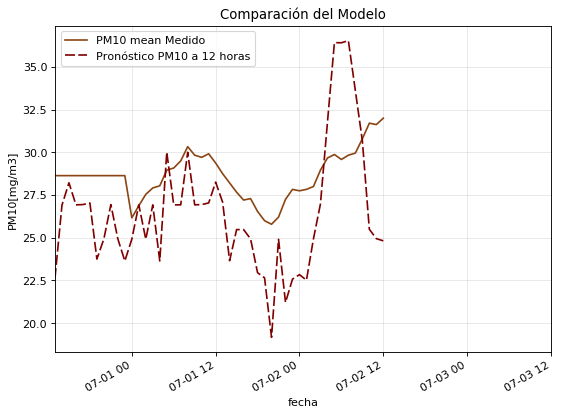

In [16]:
fig = plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
ax = fig.gca()

# df_export.tail(60).head(50).plot(x="fecha", y=[ "O3_y"],ax=ax,label=["O3 Medido"],color="dodgerblue")
# df_export.tail(60).head(100).plot(x="fecha", y=["O3_y_frcst_6"],ax=ax,label=["Pronóstico O3 a 12 horas"],color='darkblue',dashes=[6, 2])

df_export.plot(x="fecha", y=[ "PM10mean_y"],ax=ax,label=["PM10 mean Medido"],color="saddlebrown")
#df_export.plot(x="fecha", y=[ "PM10_pronóstico"],ax=ax,label=["PM10 pronostico"],color="blue")
df_export.plot(x="fecha", y=["PM10mean_y_frcst_12"],ax=ax,label=["Pronóstico PM10 a 12 horas"],color='maroon',dashes=[6, 2])

plt.ylabel("PM10[mg/m3]")
plt.title("Comparación del Modelo")


# And a corresponding grid
ax.grid(which='both')

# Or if you want different settings for the grids:
ax.grid(which='minor', alpha=0.01)
ax.grid(which='major', alpha=0.3)

now = datetime.now()
dt_string = now.strftime("%d/%m/%Y %H:%M").replace("/", "-")
plt.savefig('/home/paw/DanielBustillos/contaminación/imagenes/PM10_comparacion_'+str(dt_string)+'_.png'
            , bbox_inches='tight', dpi=400)

plt.legend()
plt.show()

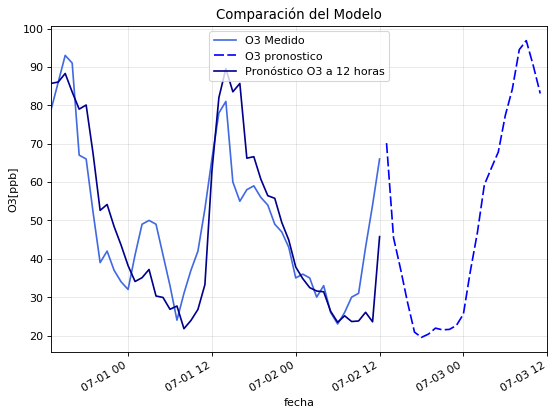

In [17]:
fig = plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
ax = fig.gca()

# df_export.tail(60).head(50).plot(x="fecha", y=[ "O3_y"],ax=ax,label=["O3 Medido"],color="dodgerblue")
# df_export.tail(60).head(100).plot(x="fecha", y=["O3_y_frcst_6"],ax=ax,label=["Pronóstico O3 a 12 horas"],color='darkblue',dashes=[6, 2])
RS_pop  = random.sample(population, k)
df_export.plot(x="fecha", y=[ "O3_y"],ax=ax,label=["O3 Medido"],color="royalblue")
df_export.plot(x="fecha", y=[ "O3_pronóstico"],ax=ax,label=["O3 pronostico"],color="blue",dashes=[6, 2])
df_export.plot(x="fecha", y=["O3_y_frcst_12"],ax=ax,label=["Pronóstico O3 a 12 horas"],color='darkblue')

plt.ylabel("O3[ppb]")
plt.title("Comparación del Modelo")




# And a corresponding grid
ax.grid(which='both')

# Or if you want different settings for the grids:
ax.grid(which='minor', alpha=0.01)
ax.grid(which='major', alpha=0.3)

now = datetime.now()
dt_string = now.strftime("%d/%m/%Y %H:%M").replace("/", "-")
plt.savefig('/home/paw/DanielBustillos/contaminación/imagenes/o3_comparacion_'+str(dt_string)+'_.png'
            , bbox_inches='tight', dpi=400)
plt.legend()
plt.show()